# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-10 (50일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 분산과 고유값 관계

## 1. 상관계수의 용도와 정의

상관계수는 연속적으로 변하는 두 변수 간의 상관관계를 확인하고 싶을때 사용 합니다. 다음은 부부의 남편과 부인의 키의 관계를 확인 합니다.  
연속적으로 변하는 두 변수의 관계는 그래프로 확인을 하는데, 두개의 연속적으로 변하는 n 개의 변수 쌍을 각각 x = 남편의 키, y = 부인의 키로 해서 산점도를 그려 보았다.

In [33]:
height = read.csv("height.csv", header = T)
W = height$Wife
H = height$Hus

In [31]:
head(height)

ROW,Hus,Wife
1,186,175
2,180,168
3,160,154
4,186,166
5,163,162
6,172,152


In [34]:
g = lm(W ~ H)

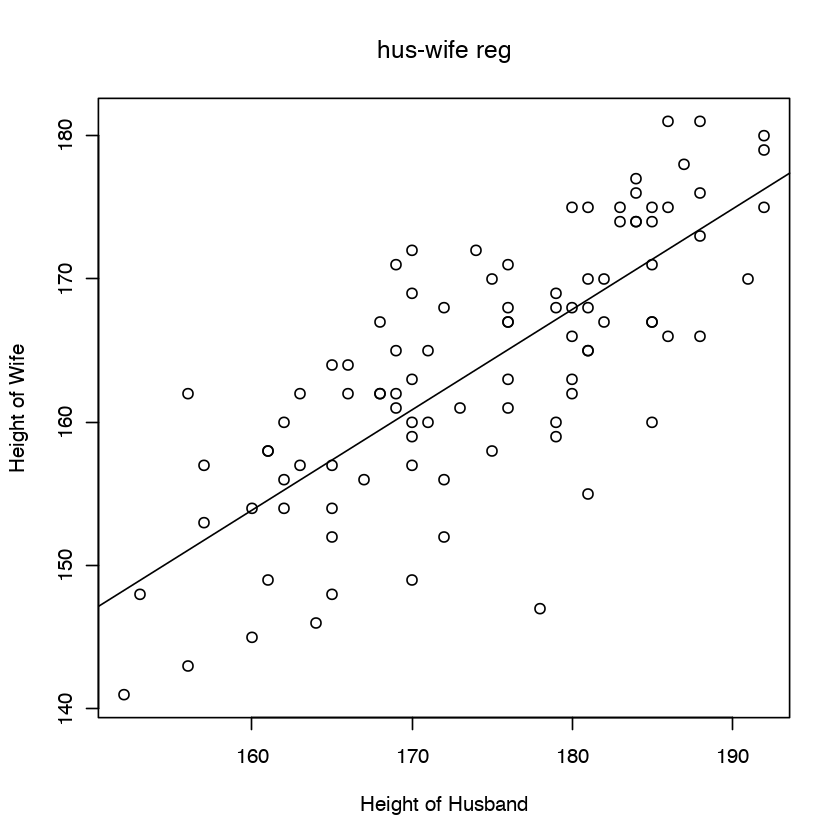

In [37]:
plot(H,W,xlab="Height of Husband",ylab="Height of Wife",main="hus-wife reg")
abline(g, lty=1)

상관계수는 다음과 같이 정의 한다.
$$
r = \dfrac{1}{n-1} \sum_{i=1}^{n} (\dfrac{(x_i - {\bar X}}{s_{\bar X}})(\dfrac{y_i - {\bar Y}}{s_{\bar Y}})
$$

## 2 벡터의 내적

상관관계와 백터의 내적을 을 살펴보면 그 식의 유사성을 알 수 있습니다. 먼저 임의 2차원 벡터 $\mathbf{A},  \mathbf{B}$  가 있다. 이들 두 벡터의 내적 $\mathbf{A}\cdot\mathbf{B}=\sum_ia_i b_i$ 로 표시한다.  

예를 들면 $\mathbf{A}, \mathbf{B}$ 를 각각 (3,4), (4, 1) 이라고 하면 $\mathbf{A}\cdot\mathbf{B}=\sum_ia_i b_i = (3 \times 4) + (4 \times 1) = 16$ 이다.

In [ ]:
#install.packages("plotrix)

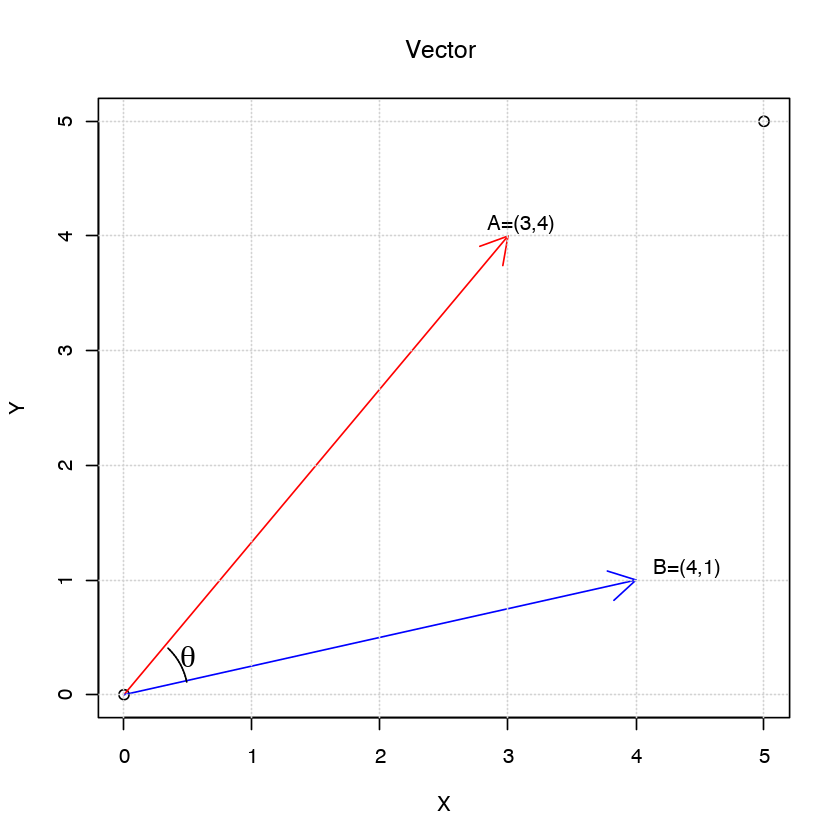

In [136]:
library(plotrix)

# 벡터 A, B 설정
A = c(3,4)
B = c(4,1)

# 원점 좌표 설정
X = c(0,5)
Y = c(0,5)

# 메인 캠퍼스 그리기
plot(X,Y,main="Vector ")

# A 벡터 그리기
arrows(x0=0,y0=0, x1=A[1], y1=A[2] ,lwd=1,col="red")
text(3.1,4.1,expression("A=(3,4)"),cex=1.0)

# B 벡터 그리기
arrows(x0=0,y0=0, x1=B[1], y1=B[2] ,lwd=1,col="blue")
text(4.4,1.1, expression("B=(4,1)"), cex=1.0)


# 사이각 표시
alpha_angle= acos((B%*%A)/(sqrt(B%*%B)*sqrt(A%*%A)))
draw.arc(0,0,0.5,angle1=0.20, angle2=alpha_angle + 0.13)
text(0.5,0.3,expression(theta),cex=1.5)

grid()

벡터의 내적은 기하학적으로 $\mathbf{A}$ 와 $\mathbf{B}$ 의 정사영에 $\mathbf{B}$ 의 크기를 곱한것과 같다. 즉 $\mathbf{A}\cdot\mathbf{B} = |\mathbf{A}|\cdot |\mathbf{B}|\; cos(\theta)$ 가 된다.  

즉 벡터 $\mathbf{A}$ 와 $\mathbf{B}$ 의 사이각 $cos(\theta) = \dfrac{\mathbf{A}\cdot\mathbf{B}}{|\mathbf A||\mathbf B|}$ 가 된다  

이것을 벡터 $\mathbf A$ 와 $\mathbf B$ 의 관계 로 표시 한다면, 이것은 다음에 보이는 분산과 같은 형식적 유사성을 같게 됩니다.

## 3. 상관계수 에서 살펴 본다면

상관계수 를 살펴보면 
$$
r = \dfrac{1}{n-1} \sum_{i=1}^{n} (\dfrac{(x_i - {\bar X}}{s_{\bar X}})(\dfrac{y_i - {\bar Y}}{s_{\bar Y}})
$$

이중에서 $s_{\bar X}$ 와 $s_{\bar Y}$ 는 표준편차 이므로 이것을 상관계수를 전개하면 다음과 같이 된다.

$$
\begin{align}
r &= \dfrac{1}{n-1} \sum_{i=1}^{n} (\dfrac{(x_i - {\bar X}}{s_{\bar X}})(\dfrac{y_i - {\bar Y}}{s_{\bar Y}}) \\
 & = \dfrac{1}{n-1} \dfrac{\sum_{i=1}^n(x_i - \bar X)(y_i - \bar Y)}{\left \{(\dfrac{1}{n-1})\sum_{i=1}^n (x_i - \bar X)^2 \right \}^{1/2} \left \{ (\dfrac{1}{n-1}) \sum_{i=1}^n (y_i - \bar Y)^2 \right \}^{1/2}} \\ 
 & = \dfrac{\sum_{i=1}^n(x_i - \bar X)(y_i - \bar Y)}{\left \{\sum_{i=1}^n (x_i - \bar X)^2 \right \}^{1/2} \left \{  \sum_{i=1}^n (y_i - \bar Y)^2 \right \}^{1/2}} \\
 & =  \dfrac{\sum_{i=1}^n a_i b_i}{\left \{\sum_{i=1}^n a_i a_i \right \}^{1/2} \left \{  \sum_{i=1}^n b_i b_i \right \}^{1/2}} 
\end{align}
$$

여기서 $\mathbf A = \{x_i - \bar X \}$, $\mathbf B = \{y_i -\bar Y \}$ 라고 놓을 수 있다.

이뜻은 테이터 셋 X 와 테이터 셋 y 를 각각 하나의 차원이 n 인 벡터 $\mathbf A$ 와 $\mathbf B$ 로 표시 할 수 있으며 그렇게 표시 한다면 상관계수는 두 벡터 사이의 사이각 $\theta$ 와 같은 의미를 갖게 됩니다.


거꾸로 말하면 $\theta$ 는 벡터 $\mathbf A, \mathbf B$ 의 서로 관계를 얼마나 잘 설명하는지와 같은 의미로 해석 할 수 있다는 뜻입니다. 또는 $\theta$ 는 벡터 A 또는 벡터 B 의 상관계수 일 뿐입니다.

## 4. 공분산 행렬 (Covariant Matrix)

### 4.1 공분산의 통계학에서 정의와 수식

공분산은 둘 이상 변량이 연관성을 가지며, 분포하는 모양을 전체적으로 나타낸 분산이다. 두개의 변량을 가진 데이터에서 두 변량이 각각 실수 $X$, $Y$ 라고 하면 각각의 기대값은 $E(X) = \mu, E(Y) = \nu$ 되 간다. 이들의 공분산은 $Cov(X,Y) = E((X-\mu)(Y- \nu))$ 가 됩니다.

기대값을 풀면 $Cov(X,Y) = E(XY) - \mu\nu$ 이 됩니다. $X,Y$ 가 독립이라면  $E(X,Y) = E(X)E(Y) = \mu\nu$ 가 됩니다. $Cov(X,Y) = \mu\nu - \mu\nu = 0$ 가 됩니다. 

### 4.2 데이터 행렬과 공분산 행렬의 유도

예를 들어 n 명의 사람으로 부터 d 개 특징을 추출했다고 하자. 이것을 가로를 d 개의 특징 (키, 무게, 손길이, 등등..), 세로를 n 명의 사람으로 하는 행렬로 표현 할 수 있습니다. 또는 세로를 d 개의 특징 가로를 n 명으로 표현하기도 합니다. 일반적으로 전자를 많이 사용합니다.  

이것를 다음과 같이 표현합니다.  


$
X = 
 \begin{bmatrix}
    X_{11} & X_{12} & \cdots & X_{1d} \\
    X_{21} & X_{22} & \cdots & X_{2d} \\
    \vdots & \vdots & \ddots & \vdots \\
    X_{n1} & x_{n2} & \cdots & X_{nd}
 \end{bmatrix} 
$

행렬 X 는 $n \times d$ 행렬이 됩니다.

이제 행렬 $X^T X$ 를 표현해 보자. 즉 transpose X 와 X 의 곱을 표현해보면 다음과 같이 됩니다.  
$$
X^T X =  
 \begin{bmatrix}
    X_{11} & X_{21} & \cdots & X_{n1} \\
    X_{12} & X_{22} & \cdots & X_{n2} \\
    \vdots & \vdots & \ddots & \vdots \\
    X_{1d} & x_{2d} & \cdots & X_{nd}
 \end{bmatrix} 
 \begin{bmatrix}  
    X_{11} & X_{12} & \cdots & X_{1d} \\
    X_{21} & X_{22} & \cdots & X_{2d} \\
    \vdots & \vdots & \ddots & \vdots \\
    X_{n1} & x_{n2} & \cdots & X_{nd} \\
 \end{bmatrix}
$$

$$
=
 \begin{bmatrix}
    X_{11}X_{11} + X_{21}X_{21} + \cdots + X_{n1}X_{n1} & X_{11}X_{12} + X_{21}X_{22} + \cdots + X_{n1}X_{n2} & \cdots \\
    X_{12}X_{11} + X_{22}X_{21} + \cdots + X_{n2}X_{n1} \\
    \vdots &   \ddots  \\
    X_{1d}X_{11} + X_{2d}X_{21} + \cdots + X_{nd}X_{n1} 
 \end{bmatrix} 
$$


$$
\Rightarrow 
 \begin{bmatrix}
    dot(X_{:1},X_{:1}) & dot(X_{:1},X_{:2}) & \cdots & dot(X_{:1},X_{:d}) \\
    dot(X_{:2},X_{:1}) & dot(X_{:2},X_{:2}) & \cdots & dot(X_{:2},X_{:d}) \\
    \vdots & \vdots & \ddots & \vdots \\
    dot(X_{:d},X_{:1}) & dot(X_{:d},X_{:d}) & \cdots & dot(X_{:d},X_{:d})
 \end{bmatrix} 
$$  

은 $d \times d$ 행렬이 됩니다. 여기서 dot 는 두벡터의 내적을 말합니다.

여기서 $(X^TX)$ 의 의미는 $d \times d$ 행렬이 되고 성분 $(X^TX)_{ij}$ 는 $dot(X_{:i}, X_{:j})$ 가 된다. 이것은 d 개의 특징 중에 i 번째 특징과 j 번째 특징의 상관계수가 됩니다. 즉 모든 사람 (n 명) 의 i 번째 특징 과 j 번째 특징의 벡터 내적이 되고, 3장에서 이야기 하고 있는 **벡터의 내적이고 i 번째 특징과 j 번쨰 특징의 상관관계가 됩니다**.

실제적으로 데이터 행렬 $(X^TX)$ 정규화가 되지 않았으므로 이것을 정규화 하기 위해서는 전체 개체수 즉 사람수 n 으로 나누어 주는 것이 맞습니다. 따라서 데이터 행렬 X 에 대한 공분산 행렬 $\Sigma$ 는 다음과 같이 정의 합니다.  

$
\Sigma = \dfrac{X^TX}{n}
$

### 4.3 공분산 행렬의 기하학적 의미

공분산 행렬내의 각 원소들은 특징벡터 두개의 내적으로 표현됩니다. 내적은 3장에서 설명했듯이 상관계수 이고, 각 특징 벡터들이 어떤 관계를 가지고 있는지 표현합니다. 즉 상관계수가 1 이라는 것은 두 벡터가 똑같다는 것이며, 0 이라는 것은 두 벡터가 전혀 다른다는 것을 의미 합니다.  

공분산행렬이 데이터 행렬에 어떤의미를 가지고 있는지 먼저 기하학적인 의미를 생각해 보기로 하자.  

선형대수에서 보면 행렬은 벡터의 방향과 크기를 변화 시키는 것이라는 것을 알고 있다. 이것을 임의 2차원 정규분포에서 임의 로 추출한 데이터 행렬에서 산점도를 표현하고 공분산행렬이라고 정한 값에 의해서 데이터행렬의 산점도가 어떻게 변하는지 살펴 보자.  

실제의 데이터 행렬을 가지고 공분산행렬을 구하기 전에, 먼저 표본정규 이변량분포를 이용하여 거기에 공분산행렬을 주어 변화시킬때 각각의 그래프 모양이 어떻게 나타나는지 살펴보면 공분산행렬의 기하학적 의미를 직관적으로 이해 할 수 있을 것이다.

In [179]:
# 먼저 두개변수의 정규분포를 뽑아서 산점도에 표현해보자.
# 패키지 설치 확인 : 타원그리기 위한 패키지
#install.packages("mixtools")

In [180]:
# 패키지 지정
library(mixtools)

In [242]:
# 샘플 갯수 지정
N = 200
# 랜텀 시드 지정
set.seed(123)

# 정규분포에 대한 모수 설정
rho = 0.0
# X 에 대한 정규분포
mu1 = 0.0; sd1 = 1.0

# Y 에 대한 정규분포
mu2 = 0.0; sd2 = 1.0

In [243]:
# 참고로 이변량 정규분포에 대한 모수 설정
# 깁스샘플링을 사용하는 경우에는 사용하지 않을 예정임.
# 평균
mu = c(mu1, mu2)
# 공분산 행렬
sigma = matrix(c(sd1^2, sd1*sd2*rho, sd1*sd2*rho, sd2^2), 2)

mu
sigma

[1] 0 0

1,0
0,1


In [244]:
# 타원 그리기 함수 설정
ellipse_bvn <- function(bvn, alpha) {
    Xbar = apply(bvn, 2, mean)
    S = cov(bvn)
    ellipse(Xbar, S, alpha = alpha, col="red")
}

In [245]:
# 이변량 정규분포 깁스 샘플링
gibbs <- function(n, mu1, s1, mu2, s2, rho) {
    mat <- matrix(ncol=2, nrow=n)
    x <- 0
    y <- 0
    mat[1,] = c(x, y)
    for(i in 2:n) {
        x <- rnorm(1, mu1 + (s1/s2) * rho * (y - mu2), sqrt((1 - rho^2)*s1^2))
        y <- rnorm(1, mu2 + (s2/s1) * rho * (x - mu1), sqrt((1 - rho^2)*s2^2))
        mat[i, ] <- c(x, y)
    }
    return(mat)
}

In [246]:
# 이변량 정규분포 생성
bvn <- gibbs(N, mu1, sd1, mu2, sd2, rho)
colnames(bvn) <- c("bvn_X", "bvn_Y")

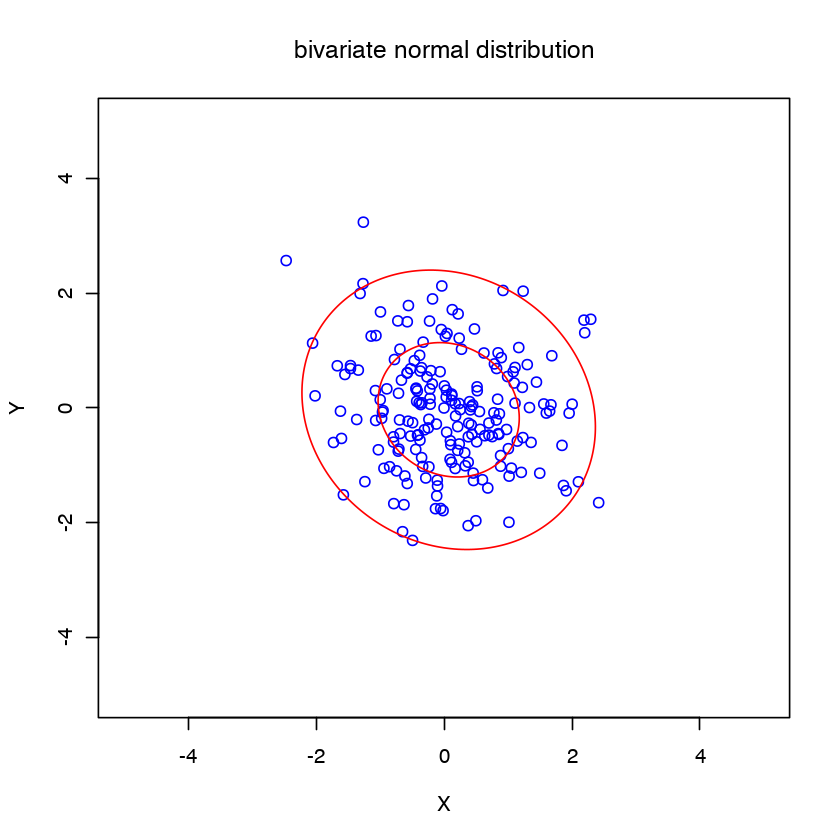

In [247]:
plot(bvn, xlab="X",ylab="Y",main= "bivariate normal distribution", xlim=c(-5,5), ylim=c(-5,5), col="blue")

ellipse_bvn(bvn,.5)
ellipse_bvn(bvn,.05)

이 데이터 행렬을 공분산행렬을 샘플링한 이변량분포에 각각을 적용해서 다시 산점도에 표현해보자.

In [248]:
# 공분산행렬 변환 함수
mytransform <- function(mydata, mysigma) {
    cmat = matrix(data=NA, ncol=dim(mydata)[2], nrow = dim(mydata)[1])
#    print(dim(cmat))
    for(i in 1:dim(mydata)[1]) {
        cmat[i,] = t(mydata[i,]) %*% mysigma
    }
    return (cmat)
}

In [249]:
#공분산행렬이 2,1,1,3 인 경우
mysigma1 = matrix(c(2,1,1,3), 2, byrow = T)
mybvn1 = mytransform(bvn, mysigma1)

In [250]:
# 공분산행렬이 2,-1,-1,3 인 경우
mysigma2 = matrix(c(2,-1,-1,3), 2, byrow = T)
mybvn2 = mytransform(bvn, mysigma2)

In [251]:
# 공분산행렬이 2,0,0,1 인 경우
mysigma3 = matrix(c(2,0,0,1), 2, byrow = T)
mybvn3 = mytransform(bvn, mysigma3)

In [252]:
# 공분산행렬이 1,0,0,2 인 경우
mysigma4 = matrix(c(1,0,0,2), 2, byrow = T)
mybvn4 = mytransform(bvn, mysigma4)

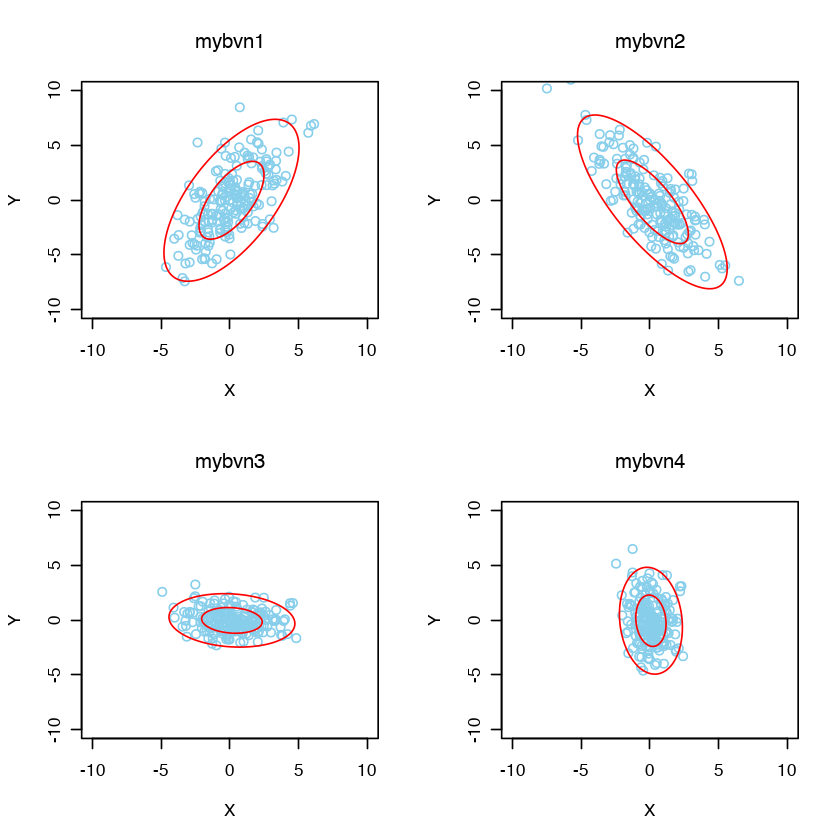

In [255]:
# 공분산 변화을 그래프로 표시
# 윈도우 설정
par(mfrow=c(2,2))

# 생성한 데이터 행렬 리스트 설정
bvn_list = list(mybvn1, mybvn2, mybvn3, mybvn4)

# 그래프 표시
for(i in 1:4) {
    item <- paste("mybvn",i,sep = "")
    plot(bvn_list[[i]], xlab="X",ylab="Y",main= item, xlim=c(-10,10), ylim=c(-10,10), col="skyblue")

    ellipse_bvn(bvn_list[[i]],.5)
    ellipse_bvn(bvn_list[[i]],.05)
}

# 리셋 윈도우
par(mfrow=c(1,1))

위 4개의 그래프는 각각 공분산을 구하면 다음과 같다.
mybvn1 =
$
\begin{bmatrix}
    2 & 1 \\
    1 & 3 \\
\end{bmatrix} 
$
mybvn2 =
$
\begin{bmatrix}
    2 & -1 \\
    -1 & 3 \\
\end{bmatrix} 
$
mybvn3 =
$
\begin{bmatrix}
    2 & 0 \\
    0 & 1 \\
\end{bmatrix} 
$
mybvn4 =
$
\begin{bmatrix}
    1 & 0 \\
    0 & 2 \\
\end{bmatrix} 
$

이것은 공분산을 직접구한것이 아니고 공분산행렬을 주어서, 공분산에 맞는 데이터행렬을 구한것이다.

지금까지는 X, Y 축에 데이터행렬을 산점도로 표시하고, 공분산행렬을 표본데이터행렬에 작용하도록 하여, 데이터행렬을 변형(회전및 길이변형)하여, 4가지 형태의 주어진 공분산행렬값을 갖는 이변량 산점도를 구해봤습니다.

## 5. 고유벡터와 최대분산 그리고 고유값

4.3 에서 공분산행렬을 이용하여 실제 데이터행렬을 회전및 변형을 하여 공분산행렬값을 갖는 데이터 행렬을 구해봤습니다.  
그러나 실제로 우리가 부딪치는 문제는 역으로 진행합니다. 우리가 아는 그리고 관측하는 것은 **데이터행렬** 입니다.  공분산을 알고, 그리고 공분산에 맞는 데이터행렬을 찾는 것이 아니고 거꾸로 **관측된 데이터행렬** 로 부터 공분산행렬을 구하고 또한 관련된 고유벡터, 고유값, 분산을 구하고자 합니다.  

따라서 이것을 해결하기 위해선, 공분산행렬을 데이터 행렬에 곱하여 변형을 하는것이 아니고, 생각을 바꾸어서 데이터 행렬은 그대로 두고 이번에는 축 X, Y축을 회전, 변경하여 분산이 최대가 되는 그런 공분산 행렬을 구하는 방법을 사용하게 됩니다.   
이것은 다음 그림을 보면 좀더 직관적으로 이해 할 수 있을수 있습니다.

<img src="pca.gif" width="700" height="700" align="center">

위 그림에서 보면 산점도 상에서 데이터행렬은 그대로 두고 직각좌표 X, Y 를 회전하면서 각 점에서 크기가 최대로 되는 (그래프 상에서는 빨간선의 총합) 곳에서 회전되는 축을 정지하게 됩니다. 그때의 축이 고유벡터가 됩니다. 그리고 그때 고유값이 최대가 되는 분산값을 구하게 됩니다. 사실은 최대가 되는 분산값이 그때의 고유값이 됩니다.  

이제는 최대가 되는 분산이 바로 고유값이 되는 이유를 보이게 됩니다. 이것을 보일려면 라그랑지 승수를 이용한 최대값 구하기 문제가  됩니다. 따라서 직관 이해하는것은 위 그림까지로도 충분하나, 좀더 이해하기 위해선 다음을 진행합니다.

먼저 위 회전하는 좌표를 보시기 바랍니다. 좌표 중심 (0,0)을 중심으로 축이 회전하면 그래프 상의 각점은 그 회전하는 축에 투영된 값을 가질것입니다.  
그럼 회전하는 축의 방향을 벡터로 표시하면 $\overrightarrow e $ 라고 하자.  
산점도 상의 각점은 회전하는 축상에 내적된 상관계수 값을 표시 할 수 있습니다. 

그 값은 데이터값 X 의 $\overrightarrow e$ 성분이 될 것입니다. 모둔 데이터의 $\overrightarrow e$ 방향 성분의 분산값은 다음과 같이 됩니다.

$$
Var(X \overrightarrow e) = \dfrac{1}{n}\sum_{i=1}^n (X\overrightarrow e - E(X\overrightarrow e))^2
$$  

이 됩니다. 원점을 중심으로 구하면 X 평균은 0 이 될 것입니다. 따라서
$$
Var(X \overrightarrow e) = \dfrac{1}{n}\sum_{i=1}^n (X\overrightarrow e)^2 
$$  
이 됩니다.

이제 이것을 전개하면 
$$
Var(X \overrightarrow e) = \dfrac{1}{n}(X\overrightarrow e)^T(X\overrightarrow e) = \dfrac{1}{n}\overrightarrow e^T X^TX\overrightarrow e = \overrightarrow e^T (\dfrac{X^TX}{n})\overrightarrow e = \overrightarrow e^T \Sigma \overrightarrow e
$$

가 된다.

이식을 진행하려면 $(AB)^T = B^TA^T$ 와 4.2 절에서 설명한 관계를 이용합니다.

따라서 분산 $Var(X \overrightarrow e) = \overrightarrow e^T \Sigma \overrightarrow e$ 관계식에서 $\overrightarrow e$ 를 $Var(X \overrightarrow e)$ 가 최대가 되도록 구하는 문제가 됩니다.  

라그랑즈 승수법을 이용하기 위해서 제약조건은 $|\overrightarrow e| = 1$ 이며, 목표함수는 $\overrightarrow e^T \Sigma \overrightarrow e$ 가 됩니다.  


이것은 라그랑즈 승수 $\lambda$ 를 도입하여 최대값이 될때 $\lambda$를 구하면 됩니다.
$$
L = \overrightarrow e^T \Sigma \overrightarrow e - \lambda(|\overrightarrow e|^2 - 1) 
$$

이것이 최대값을 갖는 조건은 $\lambda$ 에 L 을 편미분하여 극값이 되는 $\lambda$ 와 $\overrightarrow e$ 를 구하면 됩니다. 따라서 
$$
\dfrac{\partial L}{\partial \overrightarrow e} = 2 \Sigma \overrightarrow e - 2 \lambda \overrightarrow e = 0
$$

그러므로
$$
\Sigma \overrightarrow e = \lambda \overrightarrow e 
$$
조건을 만족하는 $\overrightarrow e$ 가 선택되면 즉 이것을 고유벡터 라고 하고 $\overrightarrow e^T \Sigma \overrightarrow e$ 가 최대가 됩니다. 또한 라그랑주 승수에 의해서 결정관 관계식을 이용하면

$$
Var(X\overrightarrow e) = \overrightarrow e^T \Sigma \overrightarrow e = \overrightarrow e^T \lambda \overrightarrow e = \lambda \overrightarrow e^T \overrightarrow e = \lambda
$$

가 됩니다. 따라서 이때 최대 분산은 바로 고유값임을 알 수 있습니다.